In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import yaml

import xarray as xr
import cartopy
import cartopy.crs as ccrs
from pyresample import geometry, load_area

In [2]:
areas_filepath =  '../dataset/downloads/files/areas.yaml'
area_def = load_area(areas_filepath, 'full_disk')

area_file = open(areas_filepath)
parsed_area_file = yaml.load(area_file, Loader=yaml.FullLoader)
area_dict_full_disk = parsed_area_file['full_disk']
area_dict_region = parsed_area_file['region']
area_file.close()

region_corners = area_dict_region['area_extent']
region_width = area_dict_region['width']
region_height = area_dict_region['height']
shape_full_disk = area_dict_full_disk['shape']


In [3]:
# Create image boxes
projcoords_x, projcoords_y = area_def.get_proj_vectors()

projcoords_y_diff = np.abs(projcoords_y - region_corners[3])
projcoords_x_diff = np.abs(projcoords_x - region_corners[0])

edge_ind_y = np.argmin(projcoords_y_diff)
edge_ind_x = np.argmin(projcoords_x_diff)


In [4]:
covered_hist = np.zeros((region_width, region_height))

In [5]:
covered_hist.shape

(1024, 1024)

In [6]:
mydir = '/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/'

In [12]:
#centers = []
for root, dirs, files in os.walk(mydir):
    print(root)
    for name in files:
        dataset = xr.open_dataset(os.path.join(root, name))
        dataset.close()
        #area_ext = dataset.area_extent
        #center = [np.mean([area_ext[0],area_ext[2]]), np.mean([area_ext[1],area_ext[3]])]
        #centers.append(center)
        ind_ext = dataset.ind_extent
        indx_low, indy_high, indx_high, indy_low = ind_ext
        indx_low = indx_low - edge_ind_x
        indx_high = indx_high - edge_ind_x
        indy_low = indy_low - edge_ind_y
        indy_high = indy_high - edge_ind_y
        covered_hist[indx_low:indx_high, indy_low:indy_high] += np.ones((indx_high-indx_low, indy_high-indy_low))

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-01
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-01/GPMGOES-oS2018-01-31T21:51:54-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-01/GPMGOES-oS2018-01-31T20:19:19-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-01/GPMGOES-oS2018-01-31T09:31:13-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-01/GPMGOES-oS2018-01-31T07:58:38-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-01/GPMGOES-oS2018-01-30T21:10:33-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-01/GPMGOES-oS2018-01-30T10:22:27-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Do

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-01/GPMGOES-oS2018-01-13T15:37:25-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-01/GPMGOES-oS2018-01-13T14:04:50-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-01/GPMGOES-oS2018-01-13T03:16:42-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-01/GPMGOES-oS2018-01-13T01:44:07-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-01/GPMGOES-oS2018-01-12T14:56:00-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-01/GPMGOES-oS2018-01-12T13:23:24-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-01/GPMGOES-oS2018-01-12T02:35:16-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documen

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2017-12/GPMGOES-oS2017-12-25T19:29:08-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2017-12/GPMGOES-oS2017-12-25T08:41:18-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2017-12/GPMGOES-oS2017-12-25T07:08:46-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2017-12/GPMGOES-oS2017-12-24T20:20:56-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2017-12/GPMGOES-oS2017-12-24T08:00:34-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2017-12/GPMGOES-oS2017-12-23T21:12:44-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2017-12/GPMGOES-oS2017-12-23T19:40:12-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documen

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-01/GPMGOES-oS2019-01-25T01:14:01-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-01/GPMGOES-oS2019-01-24T23:41:25-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-01/GPMGOES-oS2019-01-24T12:53:18-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-01/GPMGOES-oS2019-01-24T11:20:42-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-01/GPMGOES-oS2019-01-24T00:32:35-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-01/GPMGOES-oS2019-01-23T13:44:27-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-01/GPMGOES-oS2019-01-23T12:11:52-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documen

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-01/GPMGOES-oS2019-01-06T17:31:57-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-01/GPMGOES-oS2019-01-06T06:44:06-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-01/GPMGOES-oS2019-01-06T05:11:33-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-01/GPMGOES-oS2019-01-05T18:23:41-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-01/GPMGOES-oS2019-01-05T16:51:08-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-01/GPMGOES-oS2019-01-05T06:03:16-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-02
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-02/

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-02/GPMGOES-oS2018-02-11T17:05:46-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-02/GPMGOES-oS2018-02-11T06:17:42-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-02/GPMGOES-oS2018-02-11T04:45:08-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-02/GPMGOES-oS2018-02-10T17:57:03-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-02/GPMGOES-oS2018-02-10T07:08:59-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-02/GPMGOES-oS2018-02-10T05:36:25-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-02/GPMGOES-oS2018-02-09T18:48:20-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documen

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-02/GPMGOES-oS2019-02-23T02:40:30-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-02/GPMGOES-oS2019-02-01T10:41:39-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-02/GPMGOES-oS2019-02-22T15:52:32-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-02/GPMGOES-oS2019-02-22T05:04:33-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-02/GPMGOES-oS2019-02-22T03:31:59-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-02/GPMGOES-oS2019-02-21T16:44:00-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-02/GPMGOES-oS2019-02-01T09:09:03-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documen

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-02/GPMGOES-oS2019-02-05T19:37:30-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-02/GPMGOES-oS2019-02-05T08:49:24-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-02/GPMGOES-oS2019-02-04T22:01:18-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-02/GPMGOES-oS2019-02-04T20:28:43-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-02/GPMGOES-oS2019-02-04T09:40:37-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-02/GPMGOES-oS2019-02-04T08:08:02-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-02/GPMGOES-oS2019-02-03T10:31:49-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documen

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2021-01/GPMGOES-oS2021-01-19T04:36:20-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2021-01/GPMGOES-oS2021-01-19T03:03:46-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2021-01/GPMGOES-oS2021-01-18T16:15:48-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2021-01/GPMGOES-oS2021-01-18T05:27:50-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2021-01/GPMGOES-oS2021-01-18T03:55:16-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2021-01/GPMGOES-oS2021-01-17T17:07:18-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2021-01/GPMGOES-oS2021-01-17T15:34:44-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documen

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-01/GPMGOES-oS2020-01-30T12:40:37-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-01/GPMGOES-oS2020-01-30T11:08:04-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-01/GPMGOES-oS2020-01-30T00:20:12-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-01/GPMGOES-oS2020-01-29T22:47:39-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-01/GPMGOES-oS2020-01-29T11:59:47-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-01/GPMGOES-oS2020-01-04T07:16:24-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-01/GPMGOES-oS2020-01-29T01:11:54-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documen

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-01/GPMGOES-oS2020-01-15T16:20:29-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-01/GPMGOES-oS2020-01-15T04:00:02-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-01/GPMGOES-oS2020-01-14T17:12:08-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-01/GPMGOES-oS2020-01-14T15:39:35-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-01/GPMGOES-oS2020-01-14T04:51:41-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-01/GPMGOES-oS2020-01-13T18:03:47-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-01/GPMGOES-oS2020-01-13T16:31:13-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documen

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-03/GPMGOES-oS2018-03-30T15:23:18-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-03/GPMGOES-oS2018-03-23T05:56:13-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-03/GPMGOES-oS2018-03-22T19:08:07-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-03/GPMGOES-oS2018-03-22T17:35:32-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-03/GPMGOES-oS2018-03-30T04:35:14-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-03/GPMGOES-oS2018-03-22T06:47:27-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-03/GPMGOES-oS2018-03-21T19:59:21-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documen

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-03/GPMGOES-oS2018-03-06T11:11:21-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-03/GPMGOES-oS2018-03-06T00:23:30-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-03/GPMGOES-oS2018-03-05T22:50:56-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-03/GPMGOES-oS2018-03-05T12:03:05-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-03/GPMGOES-oS2018-03-05T10:30:32-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-03/GPMGOES-oS2018-03-04T23:42:40-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-03/GPMGOES-oS2018-03-04T11:22:16-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documen

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2021-02/GPMGOES-oS2021-02-02T23:25:48-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2021-02/GPMGOES-oS2021-02-02T12:37:54-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2021-02/GPMGOES-oS2021-02-02T11:05:20-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2021-02/GPMGOES-oS2021-02-02T00:17:25-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2021-02/GPMGOES-oS2021-02-01T11:56:56-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2021-02/GPMGOES-oS2021-02-01T01:09:01-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2021-02/GPMGOES-oS2021-02-28T16:38:21-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documen

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-03/GPMGOES-oS2019-03-01T14:29:47-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-03/GPMGOES-oS2019-03-01T12:57:13-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-03/GPMGOES-oS2019-03-01T02:09:15-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-03/GPMGOES-oS2019-03-31T16:36:06-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-03/GPMGOES-oS2019-03-30T05:06:40-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-03/GPMGOES-oS2019-03-29T05:57:54-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-03/GPMGOES-oS2019-03-28T17:37:13-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documen

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-03/GPMGOES-oS2019-03-12T11:13:03-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-03/GPMGOES-oS2019-03-12T09:40:30-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-03/GPMGOES-oS2019-03-11T22:52:33-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-03/GPMGOES-oS2019-03-11T12:04:37-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-03/GPMGOES-oS2019-03-11T10:32:03-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-03/GPMGOES-oS2019-03-10T23:44:07-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-03/GPMGOES-oS2019-03-10T22:11:33-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documen

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-04/GPMGOES-oS2018-04-22T20:22:10-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-04/GPMGOES-oS2018-04-22T09:34:19-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-04/GPMGOES-oS2018-04-21T21:13:54-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-04/GPMGOES-oS2018-04-21T10:26:03-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-04/GPMGOES-oS2018-04-21T08:53:29-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-04/GPMGOES-oS2018-04-20T22:05:38-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-04/GPMGOES-oS2018-04-20T20:33:04-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documen

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-04/GPMGOES-oS2018-04-05T02:32:39-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-04/GPMGOES-oS2018-04-04T15:44:36-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-04/GPMGOES-oS2018-04-04T14:12:01-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-04/GPMGOES-oS2018-04-04T03:23:57-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-04/GPMGOES-oS2018-04-04T01:51:23-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-04/GPMGOES-oS2018-04-03T15:03:19-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-04/GPMGOES-oS2018-04-03T02:42:41-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documen

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-03/GPMGOES-oS2020-03-21T19:54:27-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-03/GPMGOES-oS2020-03-21T09:06:32-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-03/GPMGOES-oS2020-03-20T22:18:37-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-03/GPMGOES-oS2020-03-20T20:46:03-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-03/GPMGOES-oS2020-03-20T09:58:08-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-03/GPMGOES-oS2020-03-20T08:25:35-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-03/GPMGOES-oS2020-03-19T21:37:40-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documen

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2021-03/GPMGOES-oS2021-03-31T19:14:30-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2021-03/GPMGOES-oS2021-03-31T08:26:34-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2021-03/GPMGOES-oS2021-03-31T06:54:02-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2021-03/GPMGOES-oS2021-03-30T20:06:15-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2021-03/GPMGOES-oS2021-03-03T03:16:13-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2021-03/GPMGOES-oS2021-03-30T18:33:42-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2021-03/GPMGOES-oS2021-03-30T07:45:55-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documen

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2021-03/GPMGOES-oS2021-03-15T13:00:47-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2021-03/GPMGOES-oS2021-03-15T11:28:15-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2021-03/GPMGOES-oS2021-03-15T00:40:25-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2021-03/GPMGOES-oS2021-03-14T23:07:52-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2021-03/GPMGOES-oS2021-03-14T12:20:01-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2021-03/GPMGOES-oS2021-03-14T01:32:11-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2021-03/GPMGOES-oS2021-03-13T23:59:38-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documen

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-04/GPMGOES-oS2019-04-28T09:32:14-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-04/GPMGOES-oS2019-04-28T07:59:40-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-04/GPMGOES-oS2019-04-03T04:46:52-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-04/GPMGOES-oS2019-04-27T21:11:47-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-04/GPMGOES-oS2019-04-27T08:51:20-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-04/GPMGOES-oS2019-04-26T22:03:27-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-04/GPMGOES-oS2019-04-26T20:30:54-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documen

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-04/GPMGOES-oS2019-04-11T02:34:12-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-04/GPMGOES-oS2019-04-11T01:01:38-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-04/GPMGOES-oS2019-04-10T14:13:42-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-04/GPMGOES-oS2019-04-10T03:25:39-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-04/GPMGOES-oS2019-04-10T01:53:04-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-04/GPMGOES-oS2019-04-09T15:05:01-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-04/GPMGOES-oS2019-04-09T13:32:26-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documen

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-05/GPMGOES-oS2018-05-19T12:36:29-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-05/GPMGOES-oS2018-05-19T01:48:21-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-05/GPMGOES-oS2018-05-18T13:27:37-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-05/GPMGOES-oS2018-05-29T22:35:59-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-05/GPMGOES-oS2018-05-18T02:39:29-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-05/GPMGOES-oS2018-05-18T01:06:54-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-05/GPMGOES-oS2018-05-17T14:18:45-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documen

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-05/GPMGOES-oS2018-05-02T07:06:54-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-05/GPMGOES-oS2018-05-02T05:34:21-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-05/GPMGOES-oS2018-05-01T18:46:31-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-05/GPMGOES-oS2018-05-01T07:58:41-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-05/GPMGOES-oS2018-05-01T06:26:08-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-04
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-04/GPMGOES-oS2020-04-30T21:10:35-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-04/

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-04/GPMGOES-oS2020-04-18T12:56:19-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-04/GPMGOES-oS2020-04-18T00:35:41-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-04/GPMGOES-oS2020-04-17T13:47:38-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-04/GPMGOES-oS2020-04-17T12:15:03-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-04/GPMGOES-oS2020-04-17T01:27:00-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-04/GPMGOES-oS2020-04-16T14:38:57-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-04/GPMGOES-oS2020-04-16T13:06:22-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documen

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-05/GPMGOES-oS2019-05-02T07:38:28-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-05/GPMGOES-oS2019-05-30T11:29:40-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-05/GPMGOES-oS2019-05-06T05:46:19-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-05/GPMGOES-oS2019-05-30T00:41:45-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-05/GPMGOES-oS2019-05-29T23:09:11-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-05/GPMGOES-oS2019-05-01T20:50:21-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-05/GPMGOES-oS2019-05-29T12:21:14-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documen

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-05/GPMGOES-oS2019-05-16T03:24:26-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-05/GPMGOES-oS2019-05-15T16:36:21-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-05/GPMGOES-oS2019-05-15T15:03:46-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-05/GPMGOES-oS2019-05-15T04:15:41-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-05/GPMGOES-oS2019-05-14T17:27:36-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-05/GPMGOES-oS2019-05-14T15:55:01-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-05/GPMGOES-oS2019-05-14T05:06:56-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documen

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-06/GPMGOES-oS2018-06-29T14:38:42-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-06/GPMGOES-oS2018-06-03T19:52:39-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-06/GPMGOES-oS2018-06-08T06:21:08-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-06/GPMGOES-oS2018-06-03T09:04:33-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-06/GPMGOES-oS2018-06-07T21:05:36-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-06/GPMGOES-oS2018-06-29T13:06:08-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-06/GPMGOES-oS2018-06-29T02:18:04-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documen

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-06/GPMGOES-oS2018-06-13T19:03:29-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-06/GPMGOES-oS2018-06-13T17:30:54-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-06/GPMGOES-oS2018-06-13T06:42:48-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-06/GPMGOES-oS2018-06-13T05:10:13-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-06/GPMGOES-oS2018-06-12T18:22:07-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-06/GPMGOES-oS2018-06-12T07:34:01-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-06/GPMGOES-oS2018-06-12T06:01:26-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documen

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-05/GPMGOES-oS2020-05-03T07:47:39-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-05/GPMGOES-oS2020-05-22T02:13:31-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-05/GPMGOES-oS2020-05-21T15:25:25-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-05/GPMGOES-oS2020-05-21T13:52:49-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-05/GPMGOES-oS2020-05-02T20:59:47-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-05/GPMGOES-oS2020-05-21T03:04:43-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-05/GPMGOES-oS2020-05-20T16:16:36-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documen

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-06/GPMGOES-oS2019-06-01T09:46:25-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-06/GPMGOES-oS2019-06-08T20:43:04-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-06/GPMGOES-oS2019-06-30T01:47:42-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-06/GPMGOES-oS2019-06-08T09:55:10-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-06/GPMGOES-oS2019-06-29T14:59:36-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-06/GPMGOES-oS2019-06-08T08:22:37-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-06/GPMGOES-oS2019-06-29T13:27:01-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documen

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-06/GPMGOES-oS2019-06-17T06:47:48-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-06/GPMGOES-oS2019-06-02T22:47:48-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-06/GPMGOES-oS2019-06-17T05:15:15-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-06/GPMGOES-oS2019-06-16T18:27:22-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-06/GPMGOES-oS2019-06-16T07:39:29-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-06/GPMGOES-oS2019-06-02T11:59:54-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-06/GPMGOES-oS2019-06-16T06:06:56-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documen

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-07/GPMGOES-oS2018-07-19T20:37:25-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-07/GPMGOES-oS2018-07-19T19:04:51-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-07/GPMGOES-oS2018-07-28T15:58:31-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-07/GPMGOES-oS2018-07-19T08:16:54-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-07/GPMGOES-oS2018-07-28T05:10:35-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-07/GPMGOES-oS2018-07-19T06:44:21-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-07/GPMGOES-oS2018-07-18T19:56:23-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documen

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-07/GPMGOES-oS2018-07-05T11:03:19-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-07/GPMGOES-oS2018-07-05T00:15:17-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-07/GPMGOES-oS2018-07-04T22:42:42-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-07/GPMGOES-oS2018-07-04T11:54:39-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-07/GPMGOES-oS2018-07-04T01:06:36-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-07/GPMGOES-oS2018-07-03T23:34:02-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-07/GPMGOES-oS2018-07-03T12:45:59-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documen

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-02/GPMGOES-oS2020-02-18T18:01:05-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-02/GPMGOES-oS2020-02-01T00:09:20-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-02/GPMGOES-oS2020-02-18T07:12:59-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-02/GPMGOES-oS2020-02-18T05:40:23-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-02/GPMGOES-oS2020-02-17T18:52:17-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-02/GPMGOES-oS2020-02-29T02:27:13-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-02/GPMGOES-oS2020-02-17T17:19:42-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documen

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-07/GPMGOES-oS2019-07-05T00:36:47-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-07/GPMGOES-oS2019-07-04T13:48:42-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-07/GPMGOES-oS2019-07-31T06:08:44-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-07/GPMGOES-oS2019-07-03T14:39:55-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-07/GPMGOES-oS2019-07-08T11:56:22-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-07/GPMGOES-oS2019-07-31T04:36:10-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-07/GPMGOES-oS2019-07-03T13:07:20-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documen

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-07/GPMGOES-oS2019-07-19T21:03:36-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-07/GPMGOES-oS2019-07-19T08:42:56-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-07/GPMGOES-oS2019-07-18T21:54:52-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-07/GPMGOES-oS2019-07-18T20:22:17-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-07/GPMGOES-oS2019-07-18T09:34:12-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-07/GPMGOES-oS2019-07-18T08:01:37-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-07/GPMGOES-oS2019-07-17T21:13:32-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documen

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-08/GPMGOES-oS2018-08-20T10:09:24-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-08/GPMGOES-oS2018-08-24T08:16:59-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-08/GPMGOES-oS2018-08-19T23:21:18-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-08/GPMGOES-oS2018-08-30T06:14:32-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-08/GPMGOES-oS2018-08-23T21:28:54-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-08/GPMGOES-oS2018-08-29T20:59:02-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-08/GPMGOES-oS2018-08-19T21:48:43-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documen

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-08/GPMGOES-oS2018-08-07T01:12:18-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-08/GPMGOES-oS2018-08-06T14:24:23-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-08/GPMGOES-oS2018-08-06T03:36:28-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-08/GPMGOES-oS2018-08-05T15:16:00-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-08/GPMGOES-oS2018-08-05T13:43:26-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-08/GPMGOES-oS2018-08-05T02:55:32-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-08/GPMGOES-oS2018-08-04T14:35:03-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documen

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-07/GPMGOES-oS2020-07-03T03:18:19-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-07/GPMGOES-oS2020-07-22T10:09:14-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-07/GPMGOES-oS2020-07-22T08:36:39-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-07/GPMGOES-oS2020-07-21T21:48:31-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-07/GPMGOES-oS2020-07-03T01:45:45-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-07/GPMGOES-oS2020-07-21T20:15:56-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-07/GPMGOES-oS2020-07-02T14:57:49-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documen

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-08/GPMGOES-oS2019-08-06T02:31:54-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-08/GPMGOES-oS2019-08-01T17:37:41-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-08/GPMGOES-oS2019-08-12T02:00:03-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-08/GPMGOES-oS2019-08-03T05:06:37-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-08/GPMGOES-oS2019-08-05T15:43:58-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-08/GPMGOES-oS2019-08-01T16:05:07-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-08/GPMGOES-oS2019-08-11T15:12:07-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documen

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-08/GPMGOES-oS2019-08-24T10:12:24-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-08/GPMGOES-oS2019-08-23T23:24:20-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-08/GPMGOES-oS2019-08-06T14:52:24-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-08/GPMGOES-oS2019-08-23T21:51:45-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-08/GPMGOES-oS2019-08-23T11:03:40-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-08/GPMGOES-oS2019-08-06T04:04:28-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-08/GPMGOES-oS2019-08-23T09:31:05-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documen

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-08/GPMGOES-oS2020-08-28T09:20:05-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-08/GPMGOES-oS2020-08-30T09:09:27-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-08/GPMGOES-oS2020-08-18T00:57:42-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-08/GPMGOES-oS2020-08-17T14:09:45-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-08/GPMGOES-oS2020-08-29T22:21:31-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-08/GPMGOES-oS2020-08-27T22:32:10-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-08/GPMGOES-oS2020-08-17T12:37:11-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documen

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-08/GPMGOES-oS2020-08-01T06:15:02-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-10
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-10/GPMGOES-oS2018-10-26T02:08:55-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-10/GPMGOES-oS2018-10-05T21:38:30-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-10/GPMGOES-oS2018-10-28T01:58:48-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-10/GPMGOES-oS2018-10-25T15:20:53-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-10/GPMGOES-oS2018-10-05T20:05:54-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-10/

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-10/GPMGOES-oS2018-10-31T13:17:53-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-10/GPMGOES-oS2018-10-15T06:55:38-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-10/GPMGOES-oS2018-10-15T05:23:03-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-10/GPMGOES-oS2018-10-14T18:34:59-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-10/GPMGOES-oS2018-10-14T17:02:24-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-10/GPMGOES-oS2018-10-31T02:29:51-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2018-10/GPMGOES-oS2018-10-14T06:14:20-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documen

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-09/GPMGOES-oS2019-09-02T19:29:21-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-09/GPMGOES-oS2019-09-29T00:56:55-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-09/GPMGOES-oS2019-09-28T23:24:22-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-09/GPMGOES-oS2019-09-02T08:41:17-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-09/GPMGOES-oS2019-09-10T06:28:31-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-09/GPMGOES-oS2019-09-28T12:36:30-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-09/GPMGOES-oS2019-09-02T07:08:42-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documen

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-09/GPMGOES-oS2019-09-06T19:09:17-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-09/GPMGOES-oS2019-09-16T15:13:38-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-09/GPMGOES-oS2019-09-16T04:25:36-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-09/GPMGOES-oS2019-09-16T02:53:01-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-09/GPMGOES-oS2019-09-06T17:36:42-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-09/GPMGOES-oS2019-09-15T16:04:59-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2019-09/GPMGOES-oS2019-09-15T05:16:57-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documen

/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-09/GPMGOES-oS2020-09-12T16:33:27-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-09/GPMGOES-oS2020-09-12T05:45:21-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-09/GPMGOES-oS2020-09-26T01:30:46-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-09/GPMGOES-oS2020-09-11T18:57:16-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-09/GPMGOES-oS2020-09-11T17:24:40-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-09/GPMGOES-oS2020-09-25T14:42:42-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/linkfile2020-09/GPMGOES-oS2020-09-11T06:36:34-c[8,9,10,11,13,14,15,16]-p256
/home/ingrid/Documen

In [ ]:
#centers_df = pd.DataFrame(centers, columns = ['x', 'y'])

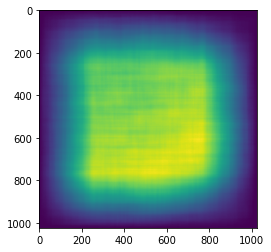

In [8]:
plt.imshow(covered_hist)

/home/ingrid/anaconda3/envs/geostat/lib/python3.8/site-packages/pyproj/crs/crs.py:543: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()
/home/ingrid/anaconda3/envs/geostat/lib/python3.8/site-packages/pyproj/crs/crs.py:543: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()


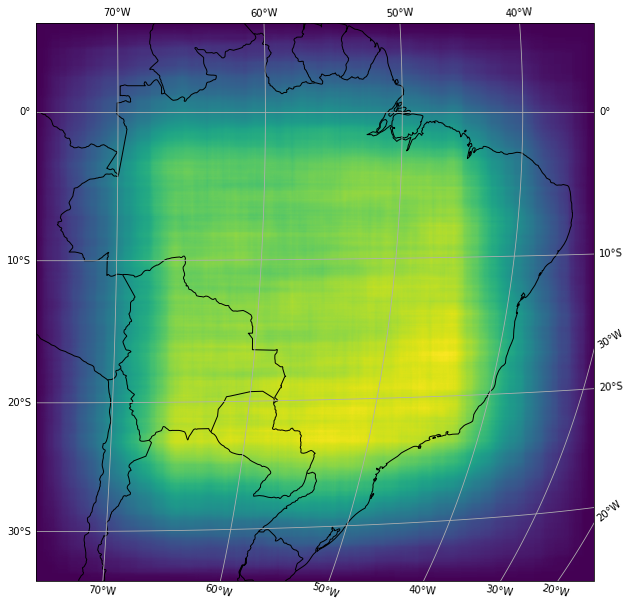

In [9]:
area_def_region = area_def.copy(area_extent = region_corners, height = region_height, width = region_width)
crs = area_def_region.to_cartopy_crs()

fig, ax = plt.subplots(subplot_kw={'projection': crs}, figsize = (10,11))

#ax.scatter(centers_df.x,centers_df.y, transform=crs, s=20, color='#64a6a1')
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.add_feature(cartopy.feature.BORDERS)
#ax.set_global()
#ax.title.set_text(plot_title)
ax.imshow(covered_hist,  transform=crs, extent=crs.bounds, vmin=0.0, vmax = np.max(covered_hist))
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()